<a href="https://colab.research.google.com/github/gabrielatorres7/PS4HouseDataExercise/blob/master/Predict_House_PricesPart_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv'
# R^2 = 0.75  Percentage of the Price explained by the indep. variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X\beta + e $$

In [174]:
url = "https://raw.githubusercontent.com/gabrielatorres7/PS4HouseDataExercise/master/train.csv"
data = pd.read_csv(url)
train = data.iloc[0:460,:]
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
train.shape
train
train.shape

(460, 81)

In [176]:
#investigate Sales Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
455    175500
456     98000
457    256000
458    161000
459    110000
Name: SalePrice, Length: 460, dtype: int64

(array([ 32., 133., 138.,  83.,  34.,  22.,   9.,   6.,   2.,   1.]),
 array([ 40000.,  91500., 143000., 194500., 246000., 297500., 349000.,
        400500., 452000., 503500., 555000.]),
 <a list of 10 Patch objects>)

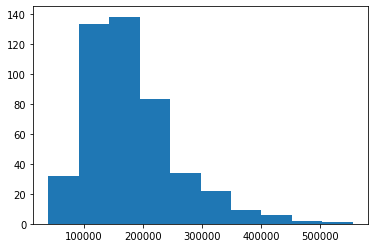

In [177]:
#plot hist
plt.hist(train['SalePrice'])

In [178]:
#select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(460, 38)

In [179]:
#correlation
corr = numeric.corr()
corr.shape

(38, 38)

In [180]:
#correlation shape price
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:5]
cols

SalePrice      1.000000
OverallQual    0.805232
GrLivArea      0.754494
GarageCars     0.686074
GarageArea     0.684000
Name: SalePrice, dtype: float64

In [181]:
#find correlations
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

In [182]:
# pick out X cols and Y = SalesPrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198
...,...,...
455,7,1242
456,5,1344
457,4,1663
458,8,1666


In [183]:
#build linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)


In [184]:
#how good the model is
model.score(X,Y)


0.7540090637721906

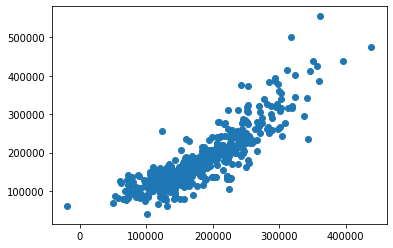

In [185]:
#Scatter plot of predictions
plt.scatter(predictions, Y)

In [186]:
#test2

In [187]:
#correlation shape price
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10]
cols

SalePrice       1.000000
OverallQual     0.805232
GrLivArea       0.754494
GarageCars      0.686074
GarageArea      0.684000
TotalBsmtSF     0.630316
1stFlrSF        0.606332
TotRmsAbvGrd    0.591826
FullBath        0.559346
YearBuilt       0.547325
Name: SalePrice, dtype: float64

In [188]:
#find correlations
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:5].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [189]:
# pick out X cols and Y = SalesPrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836
...,...,...,...,...
455,7,1242,2,528
456,5,1344,3,513
457,4,1663,2,529
458,8,1666,1,228


In [190]:
#build linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)

In [191]:
#how good the model is
model.score(X,Y)

0.7866011667961209

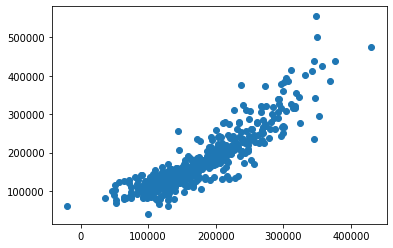

In [192]:
#Scatter plot of predictions
plt.scatter(predictions, Y)

In [193]:
#Test3

In [194]:
#correlation shape price
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:7]
cols

SalePrice      1.000000
OverallQual    0.805232
GrLivArea      0.754494
GarageCars     0.686074
GarageArea     0.684000
TotalBsmtSF    0.630316
1stFlrSF       0.606332
Name: SalePrice, dtype: float64

In [195]:
#find correlations
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:4].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars'], dtype='object')

In [196]:
# pick out X cols and Y = SalesPrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars
0,7,1710,2
1,6,1262,2
2,7,1786,2
3,7,1717,3
4,8,2198,3
...,...,...,...
455,7,1242,2
456,5,1344,3
457,4,1663,2
458,8,1666,1


In [197]:
#build linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)

In [198]:
#how good the model is
model.score(X,Y)

0.7789002229353486

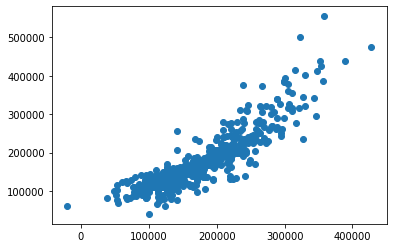

In [199]:
#Scatter plot of predictions
plt.scatter(predictions, Y)

In [200]:
#test4

In [201]:
#correlation shape price
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:20]
cols

SalePrice       1.000000
OverallQual     0.805232
GrLivArea       0.754494
GarageCars      0.686074
GarageArea      0.684000
TotalBsmtSF     0.630316
1stFlrSF        0.606332
TotRmsAbvGrd    0.591826
FullBath        0.559346
YearBuilt       0.547325
YearRemodAdd    0.532846
GarageYrBlt     0.513347
Fireplaces      0.487948
MasVnrArea      0.439313
LotFrontage     0.416858
BsmtFinSF1      0.396058
OpenPorchSF     0.382301
2ndFlrSF        0.348605
HalfBath        0.297251
WoodDeckSF      0.288442
Name: SalePrice, dtype: float64

In [202]:
#find correlations
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt'],
      dtype='object')

In [203]:
# pick out X cols and Y = SalesPrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,FullBath,YearBuilt
0,7,1710,2,548,856,856,8,2,2003
1,6,1262,2,460,1262,1262,6,2,1976
2,7,1786,2,608,920,920,6,2,2001
3,7,1717,3,642,756,961,7,1,1915
4,8,2198,3,836,1145,1145,9,2,2000
...,...,...,...,...,...,...,...,...,...
455,7,1242,2,528,1242,1242,6,1,1973
456,5,1344,3,513,624,624,7,1,1916
457,4,1663,2,529,1364,1663,6,1,1954
458,8,1666,1,228,588,833,7,1,1925


In [204]:
#build linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)

In [205]:
#how good the model is
model.score(X,Y)

0.83657512433703

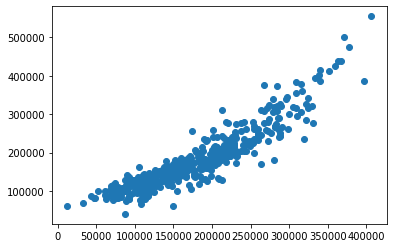

In [206]:
#Scatter plot of predictions
plt.scatter(predictions, Y)

In [207]:
#Test5

In [208]:
#correlation shape price
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:25]
cols

SalePrice       1.000000
OverallQual     0.805232
GrLivArea       0.754494
GarageCars      0.686074
GarageArea      0.684000
TotalBsmtSF     0.630316
1stFlrSF        0.606332
TotRmsAbvGrd    0.591826
FullBath        0.559346
YearBuilt       0.547325
YearRemodAdd    0.532846
GarageYrBlt     0.513347
Fireplaces      0.487948
MasVnrArea      0.439313
LotFrontage     0.416858
BsmtFinSF1      0.396058
OpenPorchSF     0.382301
2ndFlrSF        0.348605
HalfBath        0.297251
WoodDeckSF      0.288442
BsmtFullBath    0.276089
LotArea         0.264032
ScreenPorch     0.195562
BsmtUnfSF       0.186644
BedroomAbvGr    0.167278
Name: SalePrice, dtype: float64

In [209]:
#find correlations
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt'],
      dtype='object')

In [210]:
# pick out X cols and Y = SalesPrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,FullBath,YearBuilt
0,7,1710,2,548,856,856,8,2,2003
1,6,1262,2,460,1262,1262,6,2,1976
2,7,1786,2,608,920,920,6,2,2001
3,7,1717,3,642,756,961,7,1,1915
4,8,2198,3,836,1145,1145,9,2,2000
...,...,...,...,...,...,...,...,...,...
455,7,1242,2,528,1242,1242,6,1,1973
456,5,1344,3,513,624,624,7,1,1916
457,4,1663,2,529,1364,1663,6,1,1954
458,8,1666,1,228,588,833,7,1,1925


In [211]:
#build linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)

In [212]:
#how good the model is
model.score(X,Y)

0.83657512433703

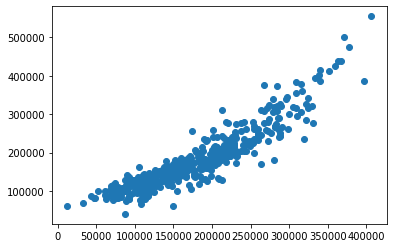

In [213]:
#Scatter plot of predictions
plt.scatter(predictions, Y)

In [ ]:
#predictions


In [216]:
predictions

array([210733.4583924 , 165562.9851263 , 220815.20709033, 198408.74350818,
       288393.42045737, 158591.67229409, 266787.63869115, 231838.86087942,
       187418.19435268, 111027.84206261, 127856.82577264, 297436.84915209,
       111715.38446716, 241104.41610166, 165528.6914166 , 141312.76793658,
       152290.62102622,  93350.87665234, 163627.24264126, 143878.99384557,
       287690.10860056, 138512.38044475, 272119.09739967, 145805.71387805,
       125947.98355904, 272216.21889359, 119563.82471161, 279280.69108102,
       178507.13326763,  32384.38685493,  87784.73038098, 143319.03424117,
       211930.48540818, 194191.66416812, 267938.35941651, 283720.12741865,
       161989.60724007, 160189.94239378, 118835.38840276,  46647.59091343,
       159949.58035724, 153854.70247643, 126202.47666456, 117529.25368394,
       133366.34027353, 289425.44274318, 286568.23775199, 276065.73182661,
        69022.56592957, 118897.33181401, 165255.69979947, 143326.92032523,
       112681.30882592, 3

In [217]:
predictions.shape


(460,)

In [218]:
i = list(range(1001,1461))
i

[1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1142,
 1143,

In [219]:
df2 = pd.DataFrame(index=i,data = predictions, columns=['SalesPrice'])
df2


,SalesPrice
1001,210733.458392
1002,165562.985126
1003,220815.207090
1004,198408.743508
1005,288393.420457
...,...
1456,199096.259687
1457,124309.819567
1458,173782.967248
1459,184458.760711


In [220]:
df2.to_csv('predictions.csv')